## Irradiance Calculations

In [43]:
from pvlib import irradiance
# import rasterio
import numpy as np
from glob import glob
from scipy import stats
import os
import sys
from pvlib.location import Location

location = Location(latitude=44.475883, longitude=-73.212074)
#inputs times (pd.datetimeindex)
#pressure (none/supplied) if none uses atmosphere.alt2pres() and self.altitude
#temp

In [25]:
import pvlib as pvlib
import pandas as pd

In [35]:
import datetime

In [62]:
now = datetime.datetime.now()

## Solar Position
Used to determine Position of the sun given a lat and lon coordinate and time.

In [63]:
df = pd.to_datetime(now)

In [64]:
df

Timestamp('2020-04-14 11:25:18.396244')

In [65]:
df = location.get_solarposition(times = df, temperature = 14) # temp is an optional argument and has little effect on the result
df

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2020-04-14 11:25:18.396244,77.432433,77.504813,12.567567,12.495187,88.658081,-0.174516


# Relationship Between Sources of Irradiance

GHI = DNI * cos(SZA) + DHI <br> <br>

GHI = Global Horizontal Irradiance <br>
SZA =e Solar Zenith Angle <br>
DHI = Diffuse Horizontal Irradiance <br>

### DNI Given GHI

In [72]:
# Estimate DNI and DHI from GHI using Erbs model
erbs = irradiance.erbs
#INPUTS
ghi = 100
zenith = df['zenith']
datetime_or_doy = df.index
min_cos_zenith = None
max_zenith = None

# https://www.sciencedirect.com/science/article/abs/pii/0038092X82903024

In [73]:
datetime_or_doy

DatetimeIndex(['2020-04-14 11:25:18.396244'], dtype='datetime64[ns]', freq=None)

In [77]:
erbs(ghi=ghi, zenith=zenith, datetime_or_doy = datetime_or_doy)

,dni,dhi,kt
2020-04-14 11:25:18.396244,39.712324,91.407937,0.340642


#### Alternative DISC Function

In [75]:
# Estimate Direct Normal Irradiance from Global Horizontal Irradiance using the DISC model
disc = irradiance.disc
#INPUTS
ghi = 100
zenith = df['zenith']
datetime_or_doy = df.index
pressure = None
min_cos_zenith = None
max_zenith = None
max_airmass = None

# https://www.nrel.gov/grid/solar-resource/disc.html

In [76]:
disc(ghi=ghi, solar_zenith=zenith, datetime_or_doy = datetime_or_doy)

,dni,kt,airmass
2020-04-14 11:25:18.396244,89.919055,0.339672,4.52752


## Clear Sky Optimal Irradiance

In [ ]:
# can be used to benchmark forecasted preformance
#a couple methods were used in the initial research 

In [104]:
from pvlib import clearsky, atmosphere, solarposition # a photo voltaic library
from pvlib.location import Location # solar calculations 
from pvlib.iotools import read_tmy3 # 
import matplotlib.pyplot as plt

### Simplified solis

In [90]:
# calculation for finding AOD for all wavelengths <to be implemented>



latitude, longitude, tz, altitude, name = 44.48057, -73.170866, 'EST', 100, 'South Burlington'


## re-run notebook with a daterange
# times = pd.date_range(start='2018-01-01', end='2020-01-01', freq='60min', tz=None)
# solpos is for UTC
# test_solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
# esxv1_solpos['ts'] = esxv1_solpos.index
# esxv1_solpos = esxv1_solpos.shift(-5)
# esxv1_solpos = esxv1_solpos[:-5]
# apparent_elevation = test_solpos['apparent_elevation']


apparent_elevation = df['apparent_elevation']

In [102]:
precipitable_water = 1
precipitable_water

1

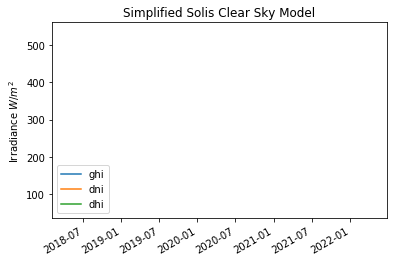

In [105]:
pressure = pvlib.atmosphere.alt2pres(altitude)

# aod700nm = atmosphere.angstrom_aod_at_lambda(1.2, 1240, alpha_exponent, 700)
# aod700nm
aod700 = 0.1 # moving on, will come back to this

dni_extra = pvlib.irradiance.get_extra_radiation(datetime_or_doy) ##

# # an input is a Series, so solis is a DataFrame
## precipitable water was a chart in v0.1
test_solis = clearsky.simplified_solis(apparent_elevation, aod700, precipitable_water,
                                  pressure, dni_extra)

ax = test_solis.plot();

ax.set_ylabel('Irradiance $W/m^2$');

ax.set_title('Simplified Solis Clear Sky Model');

ax.legend(loc='lower left');

plt.ylabel('Irradiance $W/m^2$');
plt.savefig('South Burlington CS Irradiation')

In [106]:
esxv1_solis

,ghi,dni,dhi
2020-04-14 11:25:18.396244,167.75475,536.071951,59.640708
